In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.set_index('Id',inplace=True)

In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [5]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


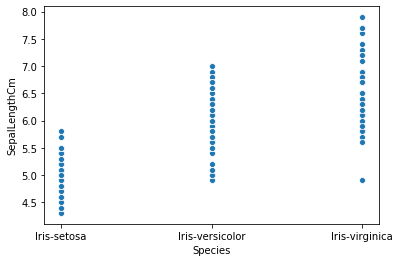

In [8]:
sns.scatterplot(data=df,y='SepalLengthCm', x='Species')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text xticklabel objects>)

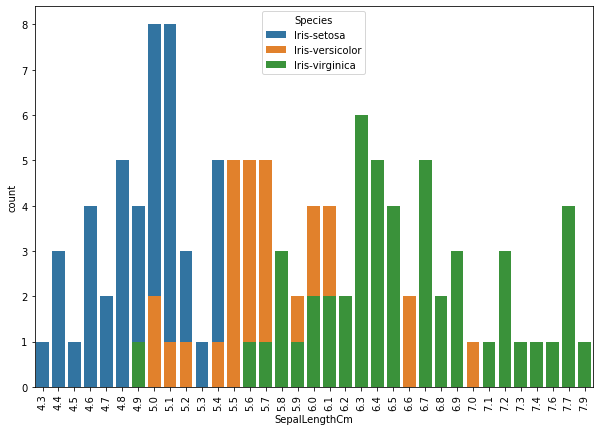

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x='SepalLengthCm', hue='Species',dodge=False )
plt.xticks(rotation=90)

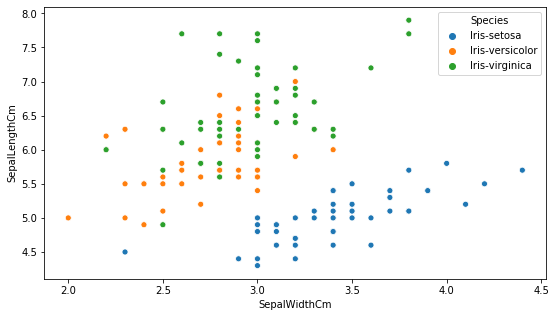

In [10]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df,y='SepalLengthCm', x='SepalWidthCm', hue='Species').get_figure().savefig('sepal length width scatter.png')

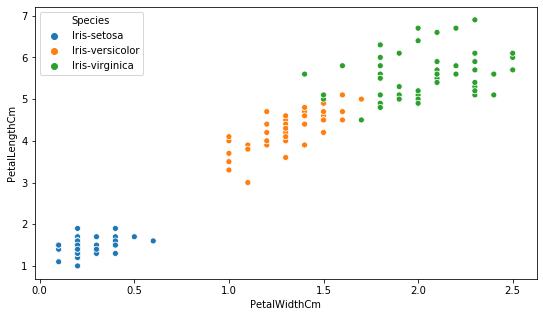

In [11]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df,y='PetalLengthCm', x='PetalWidthCm', hue='Species').get_figure().savefig('petal length width scatter.png')

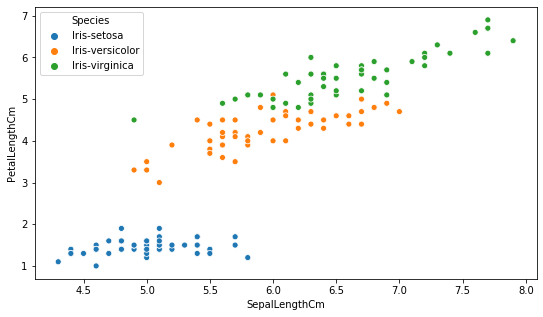

In [12]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df,y='PetalLengthCm', x='SepalLengthCm', hue='Species').get_figure().savefig('petal sepal length scatter.png')

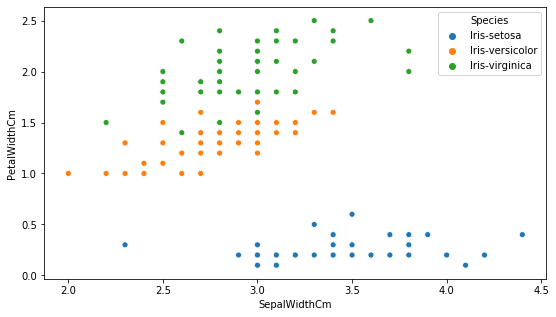

In [13]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=df,y='PetalWidthCm', x='SepalWidthCm', hue='Species').get_figure().savefig('petal sepal width scatter.png')

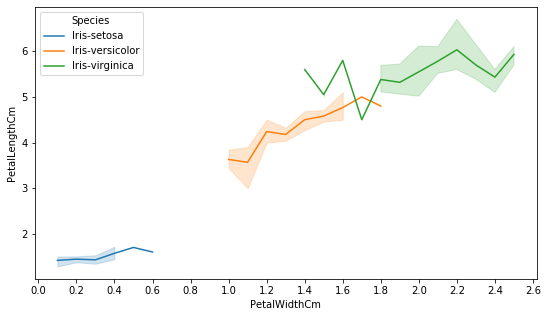

In [14]:
plt.figure(figsize=(9,5))
plt.xticks(np.arange(0,3, 0.2))
sns.lineplot(data=df,y='PetalLengthCm', x='PetalWidthCm', hue='Species').get_figure().savefig('petal length width line.png',dpi=1000)


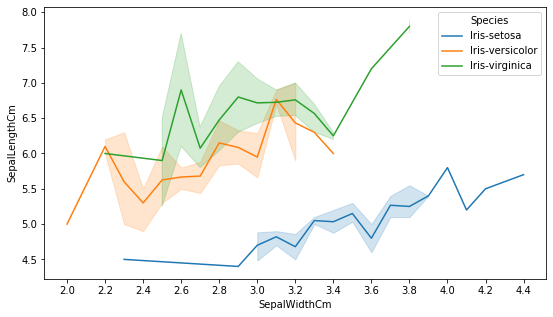

In [15]:
plt.figure(figsize=(9,5))
plt.xticks(np.arange(2,4.5, 0.2))
sns.lineplot(data=df,y='SepalLengthCm', x='SepalWidthCm', hue='Species').get_figure().savefig('sepal length widthline.png',dpi=1000)


In [ ]:
plt.figure(figsize=(9,5))
sns.lineplot(data=df,y='PetalLengthCm', x='SepalLengthCm', hue='Species').get_figure().savefig('petal sepal length line.png',dpi=1000)


In [ ]:
plt.figure(figsize=(9,5))
plt.xticks(np.arange(2,4.5, 0.2))
sns.lineplot(data=df,y='PetalWidthCm', x='SepalWidthCm', hue='Species').get_figure().savefig('petal sepal width line.png',dpi=1000)


In [ ]:
X=df.drop('Species',axis=1)
y=df['Species']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(min_weight_fraction_leaf=0.3, criterion='entropy', max_leaf_nodes=4)
dt.fit(X_train,y_train)


In [ ]:
predict= dt.predict(X_test)

In [ ]:
import pickle
with open ('irisdt.pickle','wb') as f:
    pickle.dump(dt,f)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predict))

In [ ]:
from sklearn import tree
cn=df['Species'].unique()
plt.figure(figsize=(1,1))
fig,axes=plt.subplots(nrows=1,ncols=1,dpi=400, figsize=(1,1))
tree.plot_tree(dt,class_names=cn,feature_names=X.columns, filled=True, ax=axes);
plt.tight_layout(h_pad=1.5, w_pad=1.5, pad=5)

In [ ]:
from sklearn.tree import plot_tree
cn=df['Species'].unique()
plt.figure(figsize=(1,1))
fig,axes=plt.subplots(nrows=1,ncols=1,dpi=400, figsize=(1.5,1.5))
plot_tree(dt,class_names=cn,feature_names=X.columns, filled=True, ax=axes)
plt.show()

In [ ]:
fig.savefig('iris tree.jpeg')